In [2]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
from pandas import DataFrame
from collections import defaultdict

# Initialize random number generator
#np.random.seed(123)

#df_visit_period = pd.read_csv('C:\\My_working_data\\ICIS_data_analysis\\Shift_patients\\mod_2014_01_01_90.csv')
df_visit_period = pd.read_csv('C:\\My_working_data\\ICIS_data_analysis\\Shift_patients\\mod_2014_01_01_90_F1S099_B521_M043281.csv')
df_visit_period['whenappoint'] = pd.to_datetime(df_visit_period['whenappoint'])
df_visit_period.head()


,whenappoint,mod_90_days
0,2010-06-04,47
1,2010-09-10,39
2,2010-12-10,38
3,2011-03-09,39
4,2012-02-01,70


In [162]:
VisitDate = df_visit_period['mod_90_days'].values
for i, vla in enumerate(VisitDate):
    print (i, vla)
VisitDate[i]


(0, 47)
(1, 39)
(2, 38)
(3, 39)
(4, 70)
(5, 26)
(6, 29)
(7, 28)
(8, 25)
(9, 39)
(10, 28)
(11, 30)
(12, 31)


31

In [159]:
from pymc3 import Normal, Binomial,NUTS,Uniform, sample, Model, Geometric,HalfNormal # Import relevant distributions
from pymc3 import DiscreteUniform, Geometric
from pymc3.math import invlogit
from pymc3 import find_MAP
import pymc3 as pm
import theano.tensor as tt
from pymc3 import traceplot

with Model() as patten_study_normal_45_45:
    #EarliestVisit = Uniform('EarliestVisit',0,21)
    MedsRunOut_1 = Uniform('MedsRunOut_1',lower = 45, upper = 89)
    MedsRunOut_1_1 = DiscreteUniform('MedsRunOut_1_1',lower = 0, upper = 180)
    MedsRunOut_2 = Normal('MedsRunOut_2',mu = 0, sd = 90)
    MedsRunOut_2_1 = Normal('MedsRunOut_2_1',mu = 0, sd = 10)
    MedsRunOut_3 = Normal('MedsRunOut_3',mu = 45, sd = 90)
    MedsRunOut_4 = Normal('MedsRunOut_4',mu = 90, sd = 90)
    MedsRunOut_5 = Normal('MedsRunOut_5',mu = 60, sd = 180)
    MedsRunOut_6 = HalfNormal('MedsRunOut_6', 90)
    #PostponeProb = Geometric('PostponeProb',4,10)
    VisitDate = df_visit_period['mod_90_days'].values
    #NumPostponements = np.array([])
    #Prob_NumDecisions = np.array([])
    #NumDecisions = np.array([])
    #p = 0.1
    #prob = np.array([])
    #returns = np.array([])
    #for i,val in  enumerate(VisitDate):
    #print i
#        NumPostponements = np.append(NumPostponements,EarliestVisit - (MedsRunOut - VisitDate[i]))
#        NumDecisions = np.append(NumDecisions,NumPostponements[i] + 1)
#        Prob_NumDecisions = np.append(Prob_NumDecisions, tt.switch(NumDecisions[i]<=0, 0, PostponeProb**(NumDecisions[i]-1)*(1-PostponeProb))
    #model = Normal(EarliestVisit - (MedsRunOut - VisitDate[0])+1, PostponeProb)
    #prob = np.append(prob, (p*(1/90)) + (1-p)* model)
        #print "iteration over"
    normal_return = Normal('normal_return', mu = 45, sd = 90,observed = VisitDate)
    #returns =np.append(returns, normal_return )
    trace = sample(100)
map_estimate = find_MAP(model = patten_study_normal_45_45)
print(map_estimate)
    

Assigned NUTS to MedsRunOut_1_interval_
Assigned Metropolis to MedsRunOut_1_1
Assigned NUTS to MedsRunOut_2
Assigned NUTS to MedsRunOut_2_1
Assigned NUTS to MedsRunOut_3
Assigned NUTS to MedsRunOut_4
Assigned NUTS to MedsRunOut_5
Assigned NUTS to MedsRunOut_6_log_
100%|███████████████████████████████████████| 100/100 [00:00<00:00, 143.27it/s]


Optimization terminated successfully.
         Current function value: 103.516936
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
{'MedsRunOut_1_interval_': array(0.0), 'MedsRunOut_5': array(60.0), 'MedsRunOut_4': array(90.0), 'MedsRunOut_6_log_': array(4.49980964684764), 'MedsRunOut_2_1': array(0.0), 'MedsRunOut_3': array(45.0), 'MedsRunOut_2': array(0.0), 'MedsRunOut_1_1': array(90L, dtype=int64)}


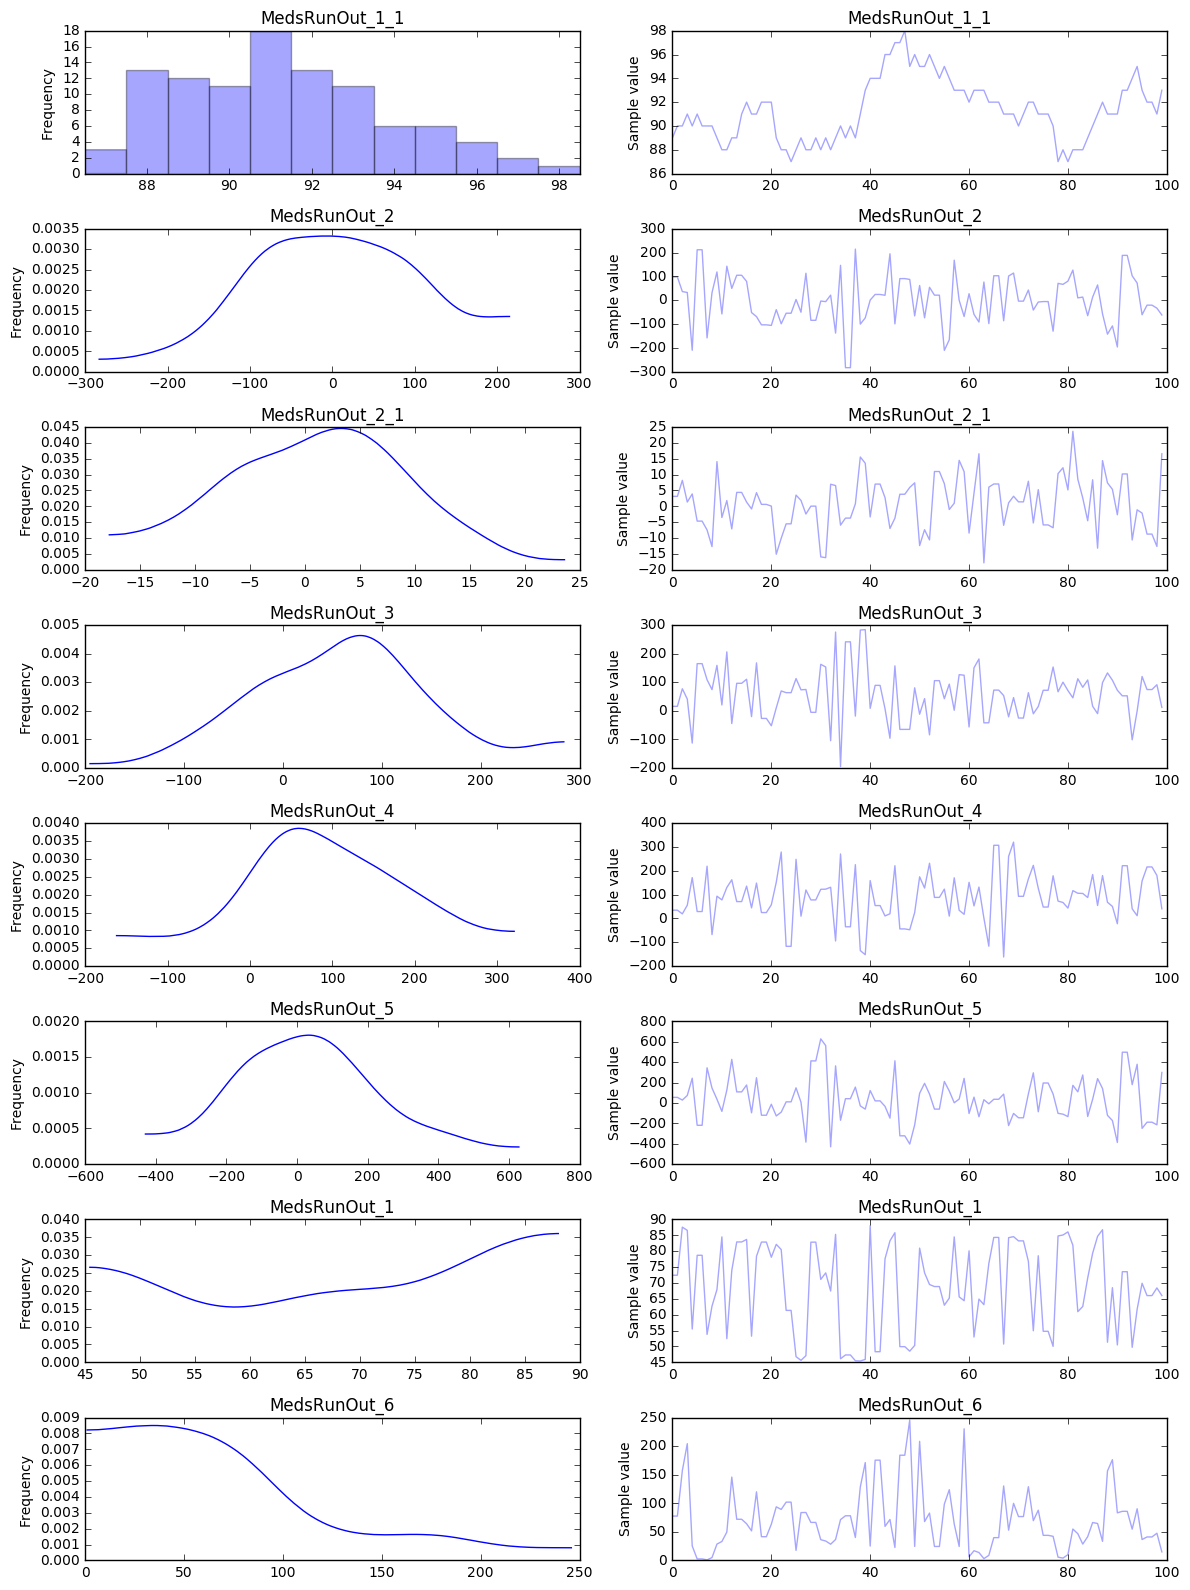

In [160]:
plt.plot(axes = traceplot(trace))
plt.show()

#pm.summary(trace)

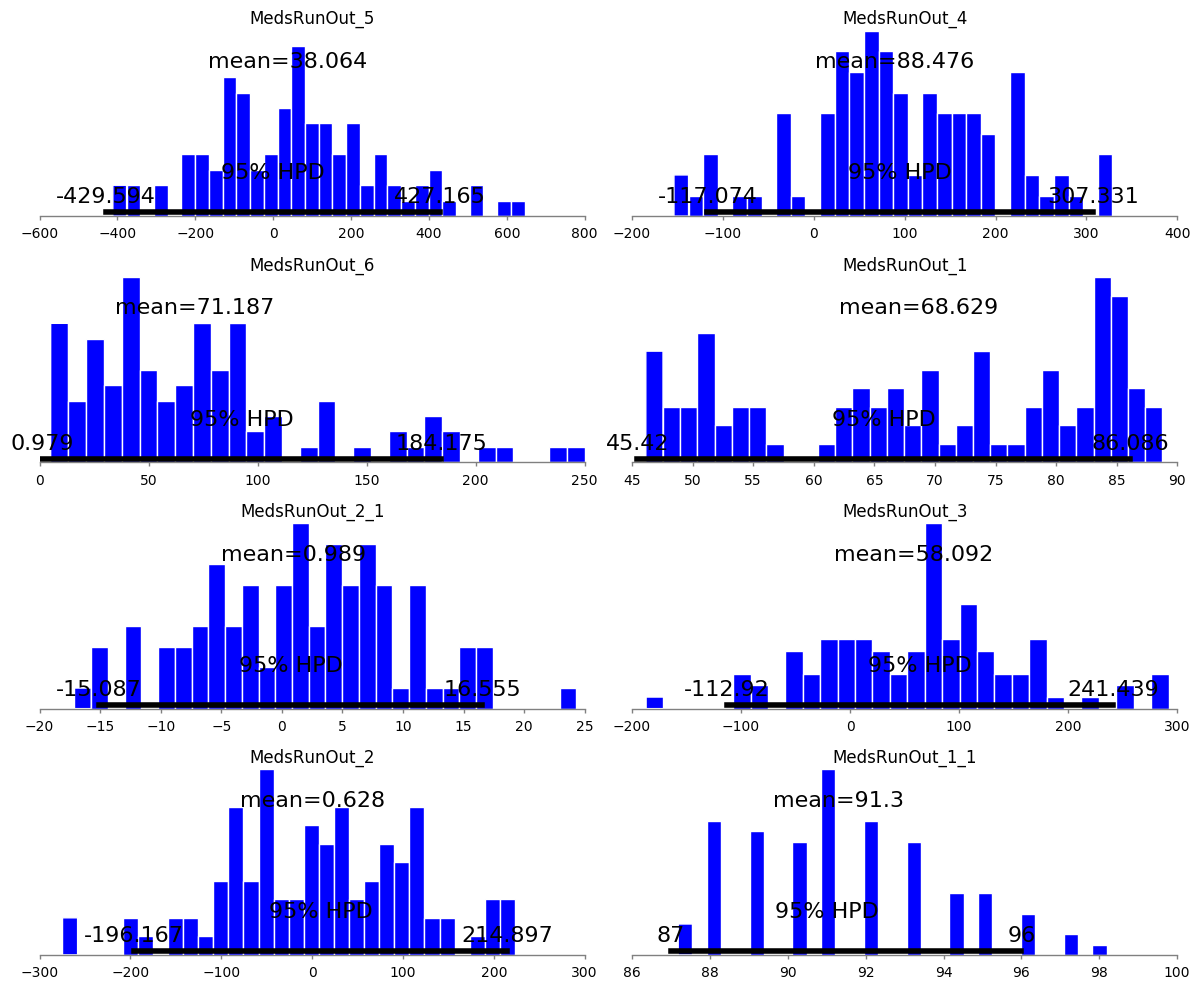

In [161]:
from pymc3 import plot_posterior
plt.plot(axes = plot_posterior(trace))
plt.show()